In [1]:
import tensorflow as tf
import zipfile
tfkl = tf.keras.layers
import csv
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
#from keras.layers import Input, Embedding, Flatten, Dense, BatchNormalization, Dropout, concatenate
#from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Load in Data

In [2]:
# loading in USMDB data
data = []
ages = []
states = []
genders = []

with open("../data/usmdb/usmdb.csv", "r") as file:
    reader = csv.reader(file,delimiter=',')
    for row_index, row in enumerate(reader):
        if row_index == 0:
            print(row)
        if row_index >= 1:
            state, gender, year, age, rate = row
            year = int(year)
            try:
                age = int(age)
            except:
                age = -1
            if state not in states:
                states.append(state)
            state = states.index(state)
            if gender not in genders:
                genders.append(gender)
            gender = genders.index(gender)
            try:
                rate = float(rate)
            except:
                rate = -1
            if rate > 1:
                rate = 1
            # get rid of years, ages, not in health data and other cleaning
            if age != -1 and rate != -1 and age <= 99:
                data.append([state, gender, year, age, rate])

data = np.array(data)

['PopName', 'Sex', 'Year', 'Age', 'mx']


In [3]:
print(data[:,0])
print(data)
print(states)
print(genders)

[ 0.  0.  0. ... 49. 49. 49.]
[[0.0000e+00 0.0000e+00 1.9590e+03 0.0000e+00 3.0050e-02]
 [0.0000e+00 0.0000e+00 1.9590e+03 1.0000e+00 1.7500e-03]
 [0.0000e+00 0.0000e+00 1.9590e+03 2.0000e+00 9.0000e-04]
 ...
 [4.9000e+01 1.0000e+00 2.0200e+03 9.7000e+01 3.8917e-01]
 [4.9000e+01 1.0000e+00 2.0200e+03 9.8000e+01 4.2072e-01]
 [4.9000e+01 1.0000e+00 2.0200e+03 9.9000e+01 4.5292e-01]]
['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
['f', 'm']


In [4]:
# df = pd.read_csv("../data/brfss/brfss_agg.csv", index_col=0)

Last minute cleaning. Will put chunk below into cleaning file soon.

In [5]:
# # removing missing - should add this to cleaning dataset in the future
# index_missing = df[ (df['sex'] == '7')].index
# df.drop(index_missing, inplace=True)

# # Mapping from FIPS code to state abbreviation
# fips_to_abbreviation = {
#     1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 12: 'FL',
#     13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY',
#     22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO',
#     30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC',
#     38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD',
#     47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI',
#     56: 'WY'
# }

# # Convert FIPS codes to state abbreviations
# df['state'] = df['state'].map(fips_to_abbreviation)

# print(df)


In [6]:
# df['year'] = pd.to_numeric(df['year'], errors='coerce')
# df['state'] = df['state'].astype('category')
# df['state'] = df['state'].apply(lambda x: states.index(x))
# df['state'] = df['state'].astype('int64')
# df['age'] = df['age'].astype('category')
# df['sex'] = df['sex'].map({'female': 0, 'male': 1})
# print(df.dtypes)

# health_data = df.to_numpy()

# Train no covariate model

In [7]:
# training and test sets 
training_index = np.logical_and(data[:, 2] >= 1959, data[:, 2] <= 2005)
training_data = data[training_index, :]
print(training_data.shape)

test_index = np.logical_and(data[:, 2] > 2005, data[:, 2] <= 2015)
test_data = data[test_index, :]

final_test_index = np.logical_and(data[:, 2] > 2015, data[:, 2] <= 2019)
final_test = data[final_test_index, :]

(470000, 5)


In [8]:
print(test_data)

[[0.0000e+00 0.0000e+00 2.0060e+03 0.0000e+00 8.3500e-03]
 [0.0000e+00 0.0000e+00 2.0060e+03 1.0000e+00 2.1000e-04]
 [0.0000e+00 0.0000e+00 2.0060e+03 2.0000e+00 6.3000e-04]
 ...
 [4.9000e+01 1.0000e+00 2.0150e+03 9.7000e+01 3.5439e-01]
 [4.9000e+01 1.0000e+00 2.0150e+03 9.8000e+01 3.8448e-01]
 [4.9000e+01 1.0000e+00 2.0150e+03 9.9000e+01 4.1548e-01]]


In [9]:
training_data = tf.convert_to_tensor(training_data)
test_data = tf.convert_to_tensor(test_data)
final_test = tf.convert_to_tensor(final_test)
# cast tensor to type float32
training_data = tf.cast(training_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
final_test = tf.cast(final_test, tf.float32)

num_train = training_data.shape[0]
num_test = test_data.shape[0]
num_final = final_test.shape[0]

In [10]:
print(final_test)

tf.Tensor(
[[0.0000e+00 0.0000e+00 2.0160e+03 0.0000e+00 4.6000e-03]
 [0.0000e+00 0.0000e+00 2.0160e+03 1.0000e+00 7.4000e-04]
 [0.0000e+00 0.0000e+00 2.0160e+03 2.0000e+00 1.9000e-04]
 ...
 [4.9000e+01 1.0000e+00 2.0190e+03 9.7000e+01 3.7822e-01]
 [4.9000e+01 1.0000e+00 2.0190e+03 9.8000e+01 4.1083e-01]
 [4.9000e+01 1.0000e+00 2.0190e+03 9.9000e+01 4.4425e-01]], shape=(40000, 5), dtype=float32)


In [11]:
# define function to fetch and process data entries from training or test data 
def get_data(index, mode):
    if mode == "train":
        # randomly selects index from training data between 0 and num_train
        rand_index = tf.random.uniform([],minval=0, maxval=num_train, dtype=tf.int32) 
        entry = training_data[rand_index, :]
    elif mode == "not_random":
        # selects specified index from test data 
        entry = test_data[index, :]
    else: 
        # for any other value of mode, randomly selects index from test
        rand_index = tf.random.uniform([],minval=0, maxval=num_test, dtype=tf.int32)
        entry = test_data[rand_index, :]
    state, gender, year, age, rate = entry[0], entry[1], entry[2], entry[3], entry[4]
    year = (year - 1998)/21
    age = tf.cast(age, tf.int32)
    state = tf.cast(state, tf.int32)
    gender = tf.cast(gender, tf.int32)
    year = tf.reshape(year, [1])
    age = tf.reshape(age, [1])
    state = tf.reshape(state, [1])
    gender = tf.reshape(gender, [1])
    rate = tf.reshape(rate, [1])
    return (year, age, state, gender), rate

In [17]:
# use get_data function to set up training and test tensorflow datasets 
dataset_train = tf.data.Dataset.from_tensor_slices(np.arange(10000))
dataset_train = dataset_train.repeat()
dataset_train = dataset_train.map(lambda x: get_data(x, mode="train"), num_parallel_calls=4)
dataset_train = dataset_train.batch(256)
dataset_train = dataset_train.prefetch(buffer_size=512)

dataset_test = tf.data.Dataset.from_tensor_slices(np.arange(10000))
dataset_test = dataset_test.repeat()
dataset_test = dataset_test.map(lambda x: get_data(x, mode="test"), num_parallel_calls=4)
dataset_test = dataset_test.batch(256)
dataset_test = dataset_test.prefetch(buffer_size=512)

dataset_test2 = tf.data.Dataset.from_tensor_slices(np.arange(100000))
dataset_test2 = dataset_test2.map(lambda x: get_data(x, mode="not_random"), num_parallel_calls=4)
dataset_test2 = dataset_test2.batch(256)
dataset_test2 = dataset_test2.prefetch(buffer_size=512)

dataset_final = tf.data.Dataset.from_tensor_slices(np.arange(10000))
dataset_final = dataset_final.repeat()
dataset_final = dataset_final.map(lambda x: get_data(x, mode="test"), num_parallel_calls=4)
dataset_final = dataset_final.batch(256)
dataset_final = dataset_final.prefetch(buffer_size=512)

In [13]:
# defining inputs 
year = tfkl.Input(shape=(1,), dtype='float32', name='Year')
age =  tfkl.Input(shape=(1,), dtype='int32', name='Age')
state = tfkl.Input(shape=(1,), dtype='int32', name='State')
gender = tfkl.Input(shape=(1,), dtype='int32', name='Gender')

# defining embedding layers 
age_embed = tfkl.Embedding(input_dim=100, output_dim=5, input_length=1, name='Age_embed')(age)
age_embed = tfkl.Flatten()(age_embed)

gender_embed = tfkl.Embedding(input_dim=2, output_dim=5, input_length=1, name='Gender_embed')(gender)
gender_embed = tfkl.Flatten()(gender_embed)

state_embed = tfkl.Embedding(input_dim=50, output_dim=5, input_length=1, name='State_embed')(state)
state_embed = tfkl.Flatten()(state_embed)

# create feature vector that concatenates all inputs 
x = tfkl.Concatenate()([year, age_embed, gender_embed, state_embed])
x1 = x

# setting up middle layers 
x = tfkl.Dense(128, activation='tanh')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.Dropout(0.05)(x)

x = tfkl.Dense(128, activation='tanh')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.Dropout(0.05)(x)

x = tfkl.Dense(128, activation='tanh')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.Dropout(0.05)(x)

x = tfkl.Dense(128, activation='tanh')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.Dropout(0.05)(x)

# setting up output layer 
x = tfkl.Concatenate()([x1, x])
x = tfkl.Dense(128, activation='tanh')(x)
x = tfkl.BatchNormalization()(x)
x = tfkl.Dropout(0.05)(x)
x = tfkl.Dense(1, activation='sigmoid', name='final')(x)

# creating the model 
model = tf.keras.Model(inputs=[year, age, state, gender], outputs=[x])

In [14]:
# compiling the model
model.compile(loss='mse', optimizer='adam')

In [15]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.25, patience=3, verbose=0, mode="auto", min_delta=1e-8, cooldown=0, min_lr=0.0)]
model.fit(dataset_train, steps_per_epoch=1000, validation_data=dataset_test, validation_steps=500, epochs=30, verbose=2, callbacks=callbacks)

Epoch 1/30
1000/1000 - 11s - loss: 0.0129 - val_loss: 1.3329e-04 - lr: 0.0010 - 11s/epoch - 11ms/step
Epoch 2/30
1000/1000 - 9s - loss: 7.0868e-04 - val_loss: 1.2407e-04 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 3/30
1000/1000 - 8s - loss: 3.4529e-04 - val_loss: 7.9755e-05 - lr: 0.0010 - 8s/epoch - 8ms/step
Epoch 4/30
1000/1000 - 10s - loss: 2.4640e-04 - val_loss: 7.8593e-05 - lr: 0.0010 - 10s/epoch - 10ms/step
Epoch 5/30
1000/1000 - 10s - loss: 1.9573e-04 - val_loss: 7.2714e-05 - lr: 0.0010 - 10s/epoch - 10ms/step
Epoch 6/30
1000/1000 - 9s - loss: 1.6164e-04 - val_loss: 8.6024e-05 - lr: 0.0010 - 9s/epoch - 9ms/step
Epoch 7/30
1000/1000 - 10s - loss: 1.3205e-04 - val_loss: 5.4233e-05 - lr: 0.0010 - 10s/epoch - 10ms/step
Epoch 8/30
1000/1000 - 10s - loss: 1.1849e-04 - val_loss: 5.3254e-05 - lr: 0.0010 - 10s/epoch - 10ms/step
Epoch 9/30
1000/1000 - 10s - loss: 1.1414e-04 - val_loss: 5.9310e-05 - lr: 0.0010 - 10s/epoch - 10ms/step
Epoch 10/30
1000/1000 - 10s - loss: 1.0059e-04 - val_loss: 

In [18]:
predictions = model.predict(dataset_test2)

391/391 [==============================] - 2s 4ms/step


In [19]:
# Get the true values from the test dataset
true_values = []
for _, rate in dataset_test2:
    true_values.extend(rate.numpy())

# Convert true_values to a numpy array
true_values = np.array(true_values)

# Convert predictions to a numpy array if not already
predictions = np.array(predictions)

# Compute MSE using TensorFlow
mse = np.mean((true_values - predictions)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.8334052e-05


In [123]:
def create_model():
    # defining inputs 
    year = tfkl.Input(shape=(1,), dtype='float32', name='Year')
    age =  tfkl.Input(shape=(1,), dtype='int32', name='Age')
    state = tfkl.Input(shape=(1,), dtype='int32', name='State')
    gender = tfkl.Input(shape=(1,), dtype='int32', name='Gender')

    # defining embedding layers 
    age_embed = tfkl.Embedding(input_dim=100, output_dim=5, input_length=1, name='Age_embed')(age)
    age_embed = tfkl.Flatten()(age_embed)

    gender_embed = tfkl.Embedding(input_dim=2, output_dim=5, input_length=1, name='Gender_embed')(gender)
    gender_embed = tfkl.Flatten()(gender_embed)

    state_embed = tfkl.Embedding(input_dim=50, output_dim=5, input_length=1, name='State_embed')(state)
    state_embed = tfkl.Flatten()(state_embed)

    # create feature vector that concatenates all inputs 
    x = tfkl.Concatenate()([year, age_embed, gender_embed, state_embed])
    x1 = x

    # setting up middle layers 
    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)

    # setting up output layer 
    x = tfkl.Concatenate()([x1, x])
    x = tfkl.Dense(128, activation='tanh')(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Dropout(0.05)(x)
    x = tfkl.Dense(1, activation='sigmoid', name='final')(x)

    # creating the model 
    model = tf.keras.Model(inputs=[year, age, state, gender], outputs=[x])

    # compiling the model
    model.compile(loss='mse', optimizer='adam')

    return model

In [155]:
def run_deep_model(dataset_train, dataset_test):
    
    model = create_model()

    callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.25, patience=3, verbose=0, mode="auto", 
                                                    min_delta=1e-8, cooldown=0, min_lr=0.0)]
    history = model.fit(dataset_train, steps_per_epoch=1000, validation_data=dataset_test, validation_steps=500, 
                        epochs=30, verbose=0, callbacks=callbacks)

    loss_info = history.history['val_loss'][-1]

    tf.keras.backend.clear_session()

    return loss_info


In [137]:
results = run_deep_model(dataset_train, dataset_test)

1000/1000 - 9s - loss: 0.0135 - val_loss: 7.8695e-04 - lr: 0.0010 - 9s/epoch - 9ms/step


In [138]:
print(results)

0.000786953023634851


# Train Lee-Carter model

In [211]:
# non-tensor train / test split (same years in training / test here as in method above)
training_index = np.logical_and(data[:, 2] >= 1959, data[:, 2] <= 2005)
training_data = data[training_index, :]
print(training_data.shape)

test_index = np.logical_and(data[:, 2] > 2005, data[:, 2] <= 2015)
test_data = data[test_index, :]

final_test_index = np.logical_and(data[:, 2] > 2015, data[:, 2] <= 2019)
final_test = data[final_test_index, :]

(470000, 5)


In [158]:
# set up lee-carter function

def lee_carter(mx_matrix):
    """
    Run the Lee-Carter model on age-specific mortality data.
    
    Args:
        mx_matrix (numpy.ndarray): A 2D array of age-specific mortality rates. rows = age, columns = years
        
    Returns:
        tuple: A tuple containing the estimated parameters (ax, bx, kt) and the fitted mortality rates.
    """
    mx_matrix[mx_matrix <= 0] = 1e-9

    ax = np.mean(np.log(mx_matrix), axis=1)
    ax = ax.reshape(-1, 1) # reshape ax into column vector
    
    centered_mx = np.log(mx_matrix) - ax
    
    # SVD
    U, S, Vt = np.linalg.svd(centered_mx, full_matrices=False)

    # extract right and left singular vectors (bx and kt)
    bx = U[:, 0]
    kt = Vt[0, :]
    # print(kt)

    # normalize bx and kt 
    bx = bx / np.sum(bx)
    # print(np.mean(kt))
    kt = kt - np.mean(kt)
    # print(np.mean(kt))

    # estimate fitted mortality 
    fitted_mort = np.exp(ax + np.outer(bx, kt))

    return (ax, bx, kt), fitted_mort

In [157]:
# set up function to run multiple models on all years in training data

def lee_carter_state_gender(data):

    states = np.unique(data[:, 0])
    genders = np.unique(data[:, 1])

    results = {}

    for state in states:
        for gender in genders:
            mask = (data[:, 0] == state) & (data[:, 1] == gender)
            state_gender_data = data[mask]

            # extract ages and years
            years = np.unique(state_gender_data[:, 2])
            ages = np.unique(state_gender_data[:, 3])

            m_x = np.zeros((len(ages), len(years)))

            for i, age in enumerate(ages):
                for j, year in enumerate(years):
                    mask = (state_gender_data[:, 3] == age) & (state_gender_data[:, 2] == year)
                    m_x[i,j] = state_gender_data[mask, 4]

            params, fitted_mort = lee_carter(m_x)
    
            # Store the results for the current state and gender
            results[(state, gender)] = {
                'params': params,
                'fitted_mortality': fitted_mort
            }
    
    return results
            

In [151]:
trial = lee_carter_state_gender(training_data)

/var/folders/1z/wn6shwbs4_9gcwtsrgz8v5vc0000gn/T/ipykernel_88639/1011471225.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m_x[i,j] = state_gender_data[mask, 4]


KeyboardInterrupt: 

In [156]:
def lee_carter_forecast(results, h, start_year, ages, drift=True):
    """
    Perform the forecasting step of the Lee-Carter method using a random walk with drift.
    
    Args:
        results (dict): A dictionary containing the estimated parameters (ax, bx, kt) for each state and gender combination.
        h (int): The number of future periods to forecast.
        start_year (int): The starting year of the forecast.
        ages (numpy.ndarray): A 1D array of ages corresponding to the rows of the mortality matrix.
        drift (bool, optional): Whether to include a drift term in the random walk. Default is True.
        
    Returns:
        numpy.ndarray: A 2D array with 5 columns representing state, gender, year, age, and forecasted mortality rate.
    """
    
    forecasts = []
    
    for state, gender in results.keys():
        ax, bx, kt = results[(state, gender)]['params']
        
        # Estimate the drift term
        if drift:
            drift_term = (kt[-1] - kt[0]) / (len(kt) - 1)
        else:
            drift_term = 0
        
        # Forecast future kt values using a random walk with drift
        kt_forecast = np.zeros(h)
        kt_forecast[0] = kt[-1]
        for i in range(1, h):
            kt_forecast[i] = kt_forecast[i-1] + drift_term + np.random.normal(0, 1)
        
        # Forecast future mortality rates
        ax_matrix = np.repeat(ax, h).reshape(-1, h)
        bx_matrix = np.repeat(bx, h).reshape(-1, h)
        kt_matrix = np.repeat(kt_forecast, len(ax)).reshape(h, -1).T
        mortality_forecast = np.exp(ax_matrix + bx_matrix * kt_matrix)


        
        # Create a 2D array with state, gender, year, age, and forecasted mortality rate
        for i in range(h):
            year = start_year + i
            for j, age in enumerate(ages):
                forecasts.append([state, gender, year, age, mortality_forecast[j, i]])

    # Convert forecasts to a NumPy array
    forecasts = np.array(forecasts)

    # Sort the forecasts array based on the first four columns
    sorted_indices = np.lexsort((forecasts[:, 3], forecasts[:, 2], forecasts[:, 1], forecasts[:, 0]))
    forecasts = forecasts[sorted_indices]

    
    return forecasts

In [159]:
# calculate MSE

def calculate_mse(forecasted_rates, actual_rates):
    """
    Calculate the Mean Squared Error (MSE) between the forecasted and actual mortality rates.
    
    Args:
        forecasted_rates (numpy.ndarray): A 2D array with 5 columns representing state, gender, year, age, and forecasted mortality rate.
        actual_rates (numpy.ndarray): A 2D array with 5 columns representing state, gender, year, age, and actual mortality rate.
        
    Returns:
        float: The Mean Squared Error (MSE) between the forecasted and actual mortality rates.
    """
    
    # Extract the forecasted and actual mortality rates
    forecasted_values = forecasted_rates[:, 4]
    actual_values = actual_rates[:, 4]
    
    # Calculate the squared differences between the forecasted and actual rates
    squared_differences = (forecasted_values - actual_values) ** 2
    
    # Calculate the Mean Squared Error (MSE)
    mse = np.mean(squared_differences)
    
    return mse

In [147]:
def run_lc_model(train_data, test_data):
    lc_output = lee_carter_state_gender(train_data)
    predictions = lee_carter_forecast(lc_output, h=10, start_year=2006, ages=range(0, 100))
    test_mse = calculate_mse(predictions, test_data)

    return np.array(test_mse)
    

In [ ]:
lc_results = run_lc_model(train_data=training_data, test_data=test_data)

# Looping function to run models 

In [160]:
def compare_models(num_iterations):
    results = []
    for i in range(num_iterations):
        lc_results = run_lc_model(train_data=training_data, test_data=test_data)
        deep_results = run_deep_model(dataset_train=dataset_train, dataset_test=dataset_test)
        results.append((deep_results, lc_results))
        print(f"Loop {i}: deep mse {results[i][0]} & lc mse {results[i][1]}")

    return results
        

In [161]:
comparison_results = compare_models(num_iterations=30)

/var/folders/1z/wn6shwbs4_9gcwtsrgz8v5vc0000gn/T/ipykernel_88639/1271048323.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m_x[i,j] = state_gender_data[mask, 4]


Loop 0: deep mse 4.0398939745500684e-05 & lc mse 0.0003915247299684933
Loop 1: deep mse 6.0458645748440176e-05 & lc mse 0.00039128320488239905
Loop 2: deep mse 4.817579247173853e-05 & lc mse 0.0003891320282911292
Loop 3: deep mse 5.007610161555931e-05 & lc mse 0.0003862197077289283
Loop 4: deep mse 4.09356398449745e-05 & lc mse 0.00038688559897930323
Loop 5: deep mse 4.911636278848164e-05 & lc mse 0.0003864877662411712
Loop 6: deep mse 4.301398075767793e-05 & lc mse 0.0003892479426403891
Loop 7: deep mse 4.956285556545481e-05 & lc mse 0.00038826033560748026
Loop 8: deep mse 4.017120591015555e-05 & lc mse 0.0003908170289735953
Loop 9: deep mse 5.103383955429308e-05 & lc mse 0.00038729158184310007
Loop 10: deep mse 4.477219408727251e-05 & lc mse 0.0003893728425534582
Loop 11: deep mse 4.873637590208091e-05 & lc mse 0.00039045673061155
Loop 12: deep mse 4.5513785153161734e-05 & lc mse 0.0003895944230450417
Loop 13: deep mse 7.137803186196834e-05 & lc mse 0.00038838044018389434
Loop 14: de

In [162]:
comparison_results

[(4.0398939745500684e-05, array(0.00039152)),
 (6.0458645748440176e-05, array(0.00039128)),
 (4.817579247173853e-05, array(0.00038913)),
 (5.007610161555931e-05, array(0.00038622)),
 (4.09356398449745e-05, array(0.00038689)),
 (4.911636278848164e-05, array(0.00038649)),
 (4.301398075767793e-05, array(0.00038925)),
 (4.956285556545481e-05, array(0.00038826)),
 (4.017120591015555e-05, array(0.00039082)),
 (5.103383955429308e-05, array(0.00038729)),
 (4.477219408727251e-05, array(0.00038937)),
 (4.873637590208091e-05, array(0.00039046)),
 (4.5513785153161734e-05, array(0.00038959)),
 (7.137803186196834e-05, array(0.00038838)),
 (5.818564386572689e-05, array(0.00038506)),
 (5.986831820337102e-05, array(0.0003871)),
 (4.108035864192061e-05, array(0.00038637)),
 (4.370341048343107e-05, array(0.0003902)),
 (4.055399767821655e-05, array(0.00039094)),
 (4.116302807233296e-05, array(0.00039022)),
 (4.791400351678021e-05, array(0.00038906)),
 (4.290840297471732e-05, array(0.00038547)),
 (6.165607

In [164]:
comp_results_np = np.array(comparison_results)

In [165]:
comp_results_np

array([[4.03989397e-05, 3.91524730e-04],
       [6.04586457e-05, 3.91283205e-04],
       [4.81757925e-05, 3.89132028e-04],
       [5.00761016e-05, 3.86219708e-04],
       [4.09356398e-05, 3.86885599e-04],
       [4.91163628e-05, 3.86487766e-04],
       [4.30139808e-05, 3.89247943e-04],
       [4.95628556e-05, 3.88260336e-04],
       [4.01712059e-05, 3.90817029e-04],
       [5.10338396e-05, 3.87291582e-04],
       [4.47721941e-05, 3.89372843e-04],
       [4.87363759e-05, 3.90456731e-04],
       [4.55137852e-05, 3.89594423e-04],
       [7.13780319e-05, 3.88380440e-04],
       [5.81856439e-05, 3.85061835e-04],
       [5.98683182e-05, 3.87097709e-04],
       [4.10803586e-05, 3.86371215e-04],
       [4.37034105e-05, 3.90197701e-04],
       [4.05539977e-05, 3.90940995e-04],
       [4.11630281e-05, 3.90221041e-04],
       [4.79140035e-05, 3.89058153e-04],
       [4.29084030e-05, 3.85472004e-04],
       [6.16560719e-05, 3.84580432e-04],
       [5.27022348e-05, 3.91918068e-04],
       [4.242498

In [193]:
deep_mean = comp_results_np[:,0].mean()
deep_med = np.median(comp_results_np[:,0])

lc_mean = comp_results_np[:,1].mean()
lc_med = np.median(comp_results_np[:,1])

lc_country_mean = 5.5
deep_country_mean = 2.68

In [194]:
state_values = [deep_mean, lc_mean]
state_data = np.array(state_values)

country_values = [deep_country_mean, lc_country_mean]
country_data = np.array(country_values)

state_data = state_data*(10 ** 4)
print(state_data)
print(country_data)

[0.48678272 3.88555611]
[2.68 5.5 ]


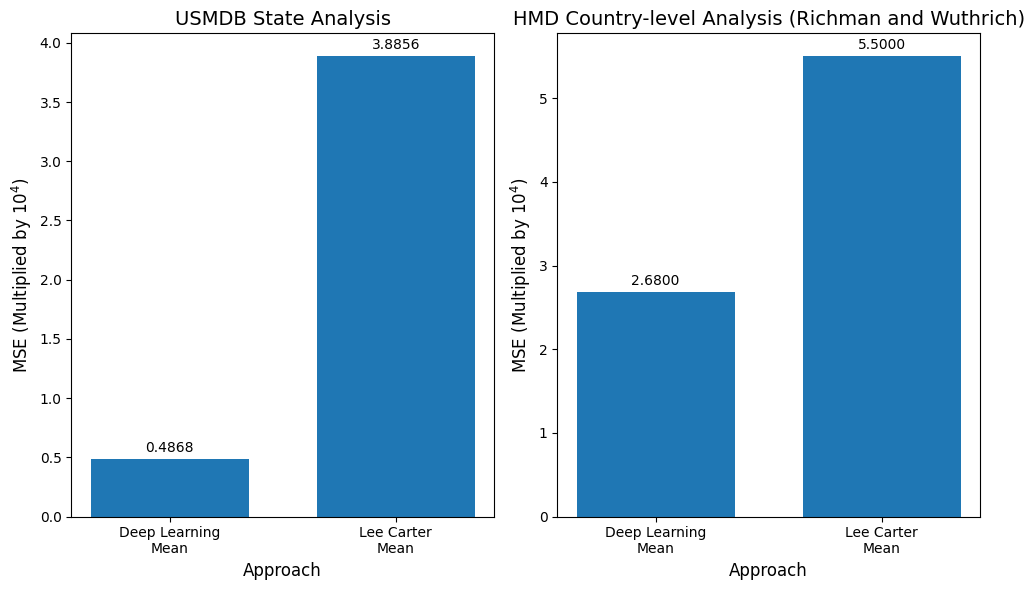

In [200]:
# Create labels for the x-axis
labels = ['Deep Learning\nMean', 'Lee Carter\nMean']

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create the bar plot for state-level analysis
bar_width = 0.7
x = np.arange(len(labels))
rects1 = ax1.bar(x, state_data, width=bar_width)

# Add labels and title for state-level plot
ax1.set_xlabel('Approach', fontsize=12)
ax1.set_ylabel('MSE (Multiplied by $10^4$)', fontsize=12)
ax1.set_title('USMDB State Analysis', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Add value labels on top of each bar for state-level plot
for rect in rects1:
    height = rect.get_height()
    ax1.annotate(f'{height:.4f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Create the bar plot for country-level analysis
rects2 = ax2.bar(x, country_data, width=bar_width)

# Add labels and title for country-level plot
ax2.set_xlabel('Approach', fontsize=12)
ax2.set_ylabel('MSE (Multiplied by $10^4$)', fontsize=12)
ax2.set_title('HMD Country-level Analysis (Richman and Wuthrich)', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)

# Add value labels on top of each bar for country-level plot
for rect in rects2:
    height = rect.get_height()
    ax2.annotate(f'{height:.4f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Adjust the layout and display the plots
fig.tight_layout()
plt.show()

In [223]:
# hard code deep covariate mse for now (comes from us-extension-brfss.ipynb with smoking and BMI)
deep_covariates = 5.0805e-05
updated_state_values = [deep_mean, deep_covariates, lc_mean]
updated_state_data = np.array(updated_state_values)
updated_state_data = updated_state_data*(10 ** 4)

In [224]:
print(updated_state_data)

[0.48678272 0.50805    3.88555611]


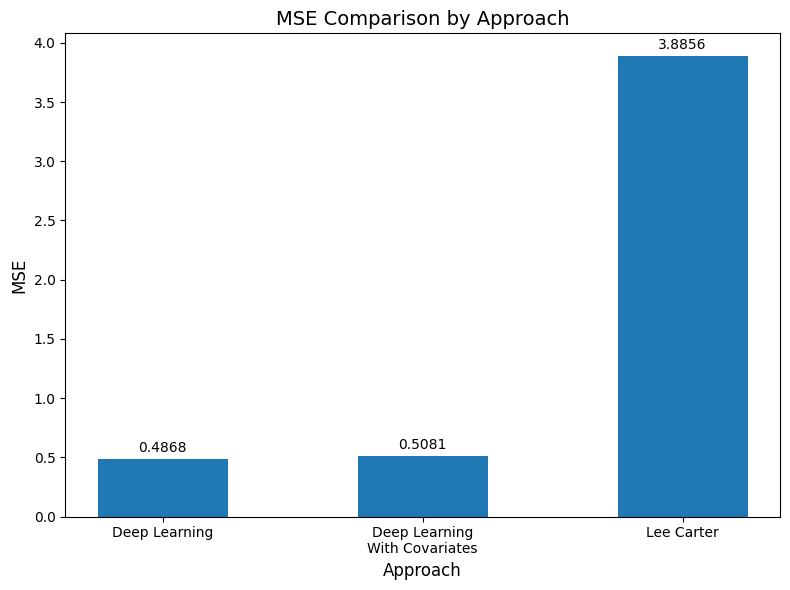

In [233]:
# Create labels for the x-axis
labels = ['Deep Learning', 'Deep Learning\nWith Covariates','Lee Carter']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot
bar_width = 0.5
x = np.arange(len(labels))
rects = ax.bar(x, updated_state_data, width=bar_width)

# Add labels and title
ax.set_xlabel('Approach', fontsize=12)
ax.set_ylabel('MSE', fontsize=12)
ax.set_title('MSE Comparison by Approach', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add value labels on top of each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()

# Residual analysis

In [203]:
final_test_index = np.logical_and(data[:, 2] > 2015, data[:, 2] <= 2019)
final_test = data[final_test_index, :]

In [206]:
final_test.shape
final_test

array([[0.0000e+00, 0.0000e+00, 2.0160e+03, 0.0000e+00, 4.6000e-03],
       [0.0000e+00, 0.0000e+00, 2.0160e+03, 1.0000e+00, 7.4000e-04],
       [0.0000e+00, 0.0000e+00, 2.0160e+03, 2.0000e+00, 1.9000e-04],
       ...,
       [4.9000e+01, 1.0000e+00, 2.0190e+03, 9.7000e+01, 3.7822e-01],
       [4.9000e+01, 1.0000e+00, 2.0190e+03, 9.8000e+01, 4.1083e-01],
       [4.9000e+01, 1.0000e+00, 2.0190e+03, 9.9000e+01, 4.4425e-01]])

In [208]:
model = create_model()
predicted_rates = model.predict([final_test[:,2], final_test[:,3], final_test[:,0], final_test[:,1]])

1250/1250 [==============================] - 1s 875us/step


In [210]:
print(predicted_rates.shape)

(40000, 1)
